<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Ogembo-View" data-toc-modified-id="Ogembo-View-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ogembo View</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Summary Stats</a></span></li><li><span><a href="#Referral-Activity" data-toc-modified-id="Referral-Activity-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Referral Activity</a></span></li></ul></li><li><span><a href="#Ogembo-2015---2017" data-toc-modified-id="Ogembo-2015---2017-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ogembo 2015 - 2017</a></span><ul class="toc-item"><li><span><a href="#The-Summary-Tables" data-toc-modified-id="The-Summary-Tables-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>The Summary Tables</a></span></li></ul></li></ul></li><li><span><a href="#All-KE-2015---2017" data-toc-modified-id="All-KE-2015---2017-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>All KE 2015 - 2017</a></span><ul class="toc-item"><li><span><a href="#Referral---Assessment-Outcomes-Nov-2017" data-toc-modified-id="Referral---Assessment-Outcomes-Nov-2017-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Referral - Assessment Outcomes Nov 2017</a></span></li><li><span><a href="#Summaries-KE---Assessment-Details" data-toc-modified-id="Summaries-KE---Assessment-Details-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Summaries KE - Assessment Details</a></span></li><li><span><a href="#Summaries-KE-2015---2017" data-toc-modified-id="Summaries-KE-2015---2017-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summaries KE 2015 - 2017</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Ogembo-Additions" data-toc-modified-id="Ogembo-Additions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ogembo Additions</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#By-HH-Quintiles" data-toc-modified-id="By-HH-Quintiles-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>By HH Quintiles</a></span></li></ul></li><li><span><a href="#All-KE-Additions" data-toc-modified-id="All-KE-Additions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>All KE Additions</a></span></li></ul></li></ul></div>

In [6]:
%run "../../zUtilz/load_envz.ipynb"

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [15]:
%run "../../zUtilz/LG_load_envz.ipynb"

ERROR:root:Cell magic `%%R` not found.


In [47]:
LAST_DATED = "26-Mar-2018" 

## Load Dataset - Ogembo Last 90 Days Dashboard
og_dt = pd.read_csv( "%s/LG/Ogembo_targeted_chv_support_ke-20180326.csv" % DATA_DIR)
og_dt.drop("Phone Number", axis=1, inplace=True)


## Load Dataset - Ogembo Last 90 Days Dashboard for referral & treatment details 
ref_og_dt = pd.read_csv( "%s/LG/1803_assessment_WO_NOV_2017.csv" % DATA_DIR)


In [141]:
#ref_og_dt.shape
#ref_og_dt.info()

ref_og_dt["health_problems"].fillna( "NO_Protocol", inplace=True)
ref_og_dt["Protocol_Supported"] = np.where( ref_og_dt["health_problems"] == "NO_Protocol", "Unsupported", "Supported")
ref_og_dt["Has_Referral"] = np.where( (ref_og_dt["assessmentoutcome"] == "Reffered only") 
                                                | (ref_og_dt["assessmentoutcome"] =="Treated and reffered"), 
                                     "Was Referred", "Was Not Referred")
ref_og_dt["Has_Treatment"] = np.where( ((ref_og_dt["assessmentoutcome"] == "treated only") 
                                                  | (ref_og_dt["assessmentoutcome"] =="Treated and reffered")), 
                                      "Was Treated", "Was Not Treated")


#ref_og_dt.sample(3)


In [4]:
## Load Dataset - KE 2015 - 2017
ke_dt = pd.read_csv( "%s/LG/Branch Data 2015-2017.csv" % DATA_DIR)


# Introduction

**What are we looking into?**
- An indication of potential sample size 
    - Reach:- Number of Study Units: CHWs, HHs, CUs reached
    - Transactions:- Number Transction Records: for a particular output 
        - E.G. for referrals, ratio of treatments to assessments and referrals
        - Sums or totals
        - Average per CHW
- Demographics 
    - KNBS et al data
    - Disease and morbidity/mortality incedence << morbidity w/r/t insurance/financial calculations 
    - 

# Ogembo View

In [39]:
## Calaculated fields
og_dt["Country"] = "KE"
og_dt["Hits_Sales_Target"]= np.where( og_dt["Sales"] < SALES_TARGET, 0, 1)
#quintilize(og_dt, "Households Registered")

og_dt["Total Assessments"] = og_dt["Total U1 Assessments"] + og_dt["Total U5 Assessments"] 
og_dt["Total Treatments"] = og_dt["Total U1 Treatments"] + og_dt["Total U5 Treatments"] 
og_dt["Total Referrals"] = og_dt["On Time Referral f/u Treatment U5"] 


### Compute some %s 
def pctAssessment( x ):
    og_dt[ "Pct_"+x+"_in_Assessed"] = np.nan_to_num( og_dt[x] / og_dt["Total Assessments"]) 
def pctTreatment( x ): 
    og_dt[ "Pct_"+x+"_in_Treated"] = np.nan_to_num( og_dt[x] / og_dt["Total Treatments"]) 
    
argz_pct_in_assessed = ["Community Events", "Pregnancy", "Total Referrals", 
                        "Total Treatments", "All Malaria Treatments", 
                        "All Malaria Assessments", "Total U1 Assessments", "Total U5 Assessments",
                        "U5 Malaria", "U5 Pneumonia", "U5 Diarrhea", 
                       ] 
dnul = pd.Series( argz_pct_in_assessed ).apply(lambda x: pctAssessment(x) )

argz_pct_in_treated = ["Total Referrals",
                       "Total U1 Treatments", "Total U5 Treatments", "All Malaria Treatments", 
                        "U5 Malaria", "U5 Pneumonia", "U5 Diarrhea", 
                       ]
dnul = pd.Series( argz_pct_in_treated ).apply(  lambda x: pctTreatment(x) )




### Variables
argz_n = ["CHP ID"]

argz_EPM = ["Sales", "Community Events", "Pregnancy", "Total Referrals","Total Treatments", "Total Assessments","All Malaria Assessments"]

argz_malaria = ["All Malaria Assessments", "All Malaria Treatments", "U5 Malaria", "Act 6pack Issue", "mRDT Used"]
argz_cases = ["U5 Malaria", "U5 Pneumonia", "U5 Diarrhea"]
argz_axns = ["Total Assessments", "Total Treatments", "Total Referrals", "All Malaria Assessments", "All Malaria Treatments"]
argz_referral = ["Total Referrals"]
argz_pregoz = ["Pregnancy"]
argz_u1_u5 = ["Total U1 Assessments", "Total U1 Treatments","Total U5 Assessments", "Total U5 Treatments"]


argz_pct = np.array( pd.Series( ["Total Treatments", "Total Referrals", "All Malaria Treatments","Total U1 Assessments","Total U5 Assessments"]).apply(lambda x: "Pct_"+x+"_in_Assessed" ) )
#og_dt[argz_pct[0]].head()
#og_dt.info()

#og_dt[["Total Assessments","Total U1 Assessments","Total U5 Assessments", "Total Referrals", "On Time Referral f/u Treatment U5"]].head(4)
#og_dt.info()


### Summary Stats
** Sample Size Indication **
- Reach: CHWs, Households
- Transactions: Referrals, 

In [49]:
print("\n\n Number of CHPs and Households with Activity in Nov-2017")
pd.pivot_table( ref_og_dt[ ref_og_dt["branch"]=="Ogembo"], index=["branch","supervisor"], 
               values=["chpid", "patient_id", "uuid", "patient_age_in_years"], 
               aggfunc={"uuid": "count", 
                        "chpid": "count", 
                        "patient_id": "count", 
                        "patient_age_in_years": np.mean}, 
               margins=True )



 Number of CHPs and Households with Activity in Jan-2018


chpid  patient_age_in_years  patient_id    uuid
branch supervisor                                                             
Ogembo Agripina Mukungu        609.0              1.522167       609.0   609.0
       Alfred Oula             853.0              1.901524       853.0   853.0
       Hadija Singor Shaban   1239.0              1.981437      1239.0  1239.0
       Michael Nyongesa        881.0              1.821793       881.0   881.0
       Pauline Okondo Omolo    825.0              1.740606       825.0   825.0
       Unassigned Supervisor    36.0              1.444444        36.0    36.0
All                           4443.0              1.822417      4443.0  4443.0

### Referral Activity 
- Most cases are dealt with at the community; treating more numbers than are being referred. 




1. Referrals


patient_id                                     \
assessmentoutcome         Assessed Only Reffered only Treated and reffered   
branch Protocol_Supported                                                    
Ogembo Supported                  247.0         112.0                517.0   
       Unsupported                 56.0          64.0                  NaN   
All                               303.0         176.0                517.0   

                                                
assessmentoutcome         treated only     All  
branch Protocol_Supported                       
Ogembo Supported                3447.0  4323.0  
       Unsupported                 NaN   120.0  
All                             3447.0  4443.0

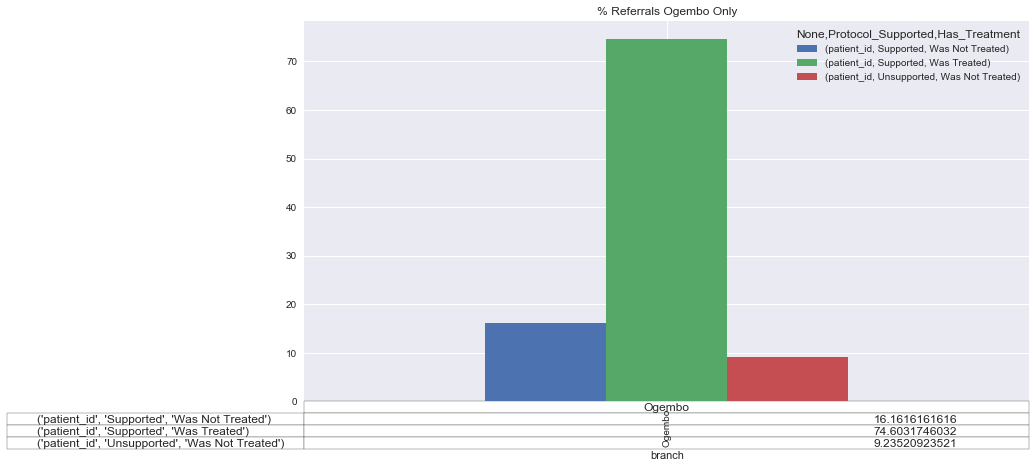

In [133]:

print("\n\n1. Referrals")
pd.pivot_table( ref_og_dt[ ref_og_dt["branch"]=="Ogembo"], index=["branch","Protocol_Supported",], 
               columns = ["assessmentoutcome",], 
               values=["patient_id"], 
               aggfunc="count", 
               margins=True )
dt = pd.pivot_table( ref_og_dt[ (ref_og_dt["Has_Referral"]=="Was Referred") & (ref_og_dt["branch"]=="Ogembo")], index=["branch"], 
               columns = [ "Protocol_Supported", "Has_Treatment"], 
               values=["patient_id"], 
               aggfunc="count", 
               margins=False ).round(4) /(len(ref_og_dt[ (ref_og_dt["Has_Referral"]=="Was Referred")& (ref_og_dt["branch"]=="Ogembo")])) * 100
dt.plot( kind="bar", title="% Referrals Ogembo Only", figsize=(13,7), table=True) 


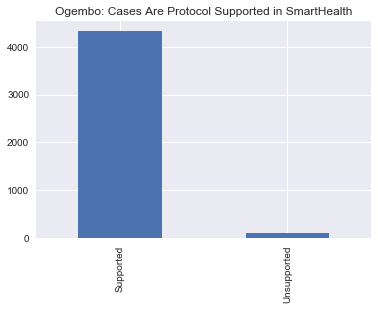

In [163]:
#f,a = plt.subplots( figsize=(10,7), nrows=2,ncols=2) 
dt = ref_og_dt[ ref_og_dt["branch"]=="Ogembo"] 
#f.add_subplot( dt["Protocol_Supported"].value_counts().plot(kind="bar", title="Cases Are Protocol Supported in SmartHealth"), 111)
#f.add_subplot( dt["assessmentoutcome"].value_counts().plot(kind="bar", title="Assessment Outcome"), 122)
#f.add_subplot( dt["Has_Referral"].value_counts().plot(kind="bar", title="All Assessments By Was Referred"), 213)
#f.add_subplot( dt["Has_Treatment"].value_counts().plot(kind="bar", title="All Assessments By Was Treated"), 224)
#plt.show()

dt["Protocol_Supported"].value_counts().plot(kind="bar", title="Ogembo: Cases Are Protocol Supported in SmartHealth")

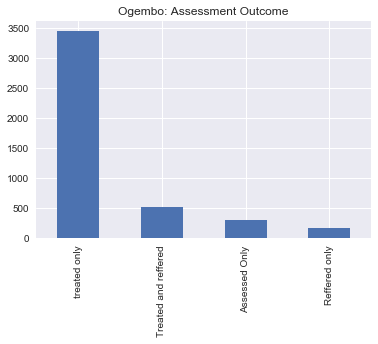

In [164]:
dt["assessmentoutcome"].value_counts().plot(kind="bar", title="Ogembo: Assessment Outcome")

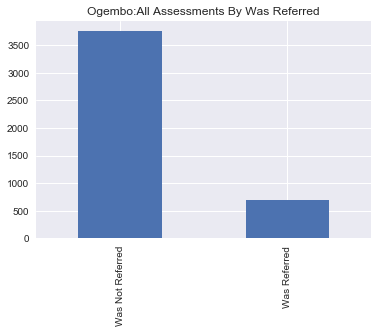

In [165]:
dt["Has_Referral"].value_counts().plot(kind="bar", title="Ogembo:All Assessments By Was Referred")

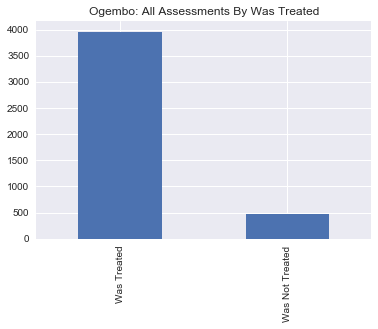

In [166]:
dt["Has_Treatment"].value_counts().plot(kind="bar", title="Ogembo: All Assessments By Was Treated")

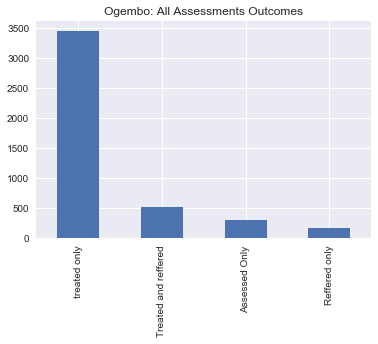

In [167]:
dt["assessmentoutcome"].value_counts().plot(kind="bar", title="Ogembo: All Assessments Outcomes")



 Summarizing Key Variables 


,Sales,Community Events,Pregnancy,Total Referrals,Total Treatments,Total Assessments,All Malaria Assessments
# CHW,72.00,72.00,72.00,72.00,72.0,72.00,72.00
# Cases or Sum,525323.29,448.00,243.00,48.30,1476.0,4642.00,928.00
Avg. per CHW,7296.16,6.22,3.38,0.67,20.5,64.47,12.89
Max per CHW,59812.62,29.00,10.00,1.00,88.0,170.00,76.00
Min per CHW,-1040.00,0.00,0.00,0.00,0.0,0.00,0.00




 Summarizing Activities 


,Pregnancy,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,Total Referrals
# CHW,72.00,72.00,72.00,72.0,72.00,72.00,72.0,72.00,72.00
# Cases or Sum,243.00,418.00,398.00,432.0,891.00,228.00,3751.0,1248.00,48.30
Avg. per CHW,3.38,5.81,5.53,6.0,12.38,3.17,52.1,17.33,0.67
Max per CHW,10.00,51.00,32.00,30.0,33.00,15.00,137.0,77.00,1.00
Min per CHW,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00




 Graph of Key Assessment Activites as % of Total Assessments- Last 90 Days to 26-Mar


,Pct_Total Treatments_in_Assessed,Pct_Total Referrals_in_Assessed,Pct_All Malaria Treatments_in_Assessed,Pct_Total U1 Assessments_in_Assessed,Pct_Total U5 Assessments_in_Assessed
# CHW,72.00,72.00,72.00,72.00,72.00
# Cases or Sum,22.43,0.85,6.91,12.68,56.32
Avg. per CHW,0.31,0.01,0.10,0.18,0.78
Max per CHW,1.17,0.08,0.69,0.33,0.97
Min per CHW,0.00,0.00,0.00,0.00,0.00


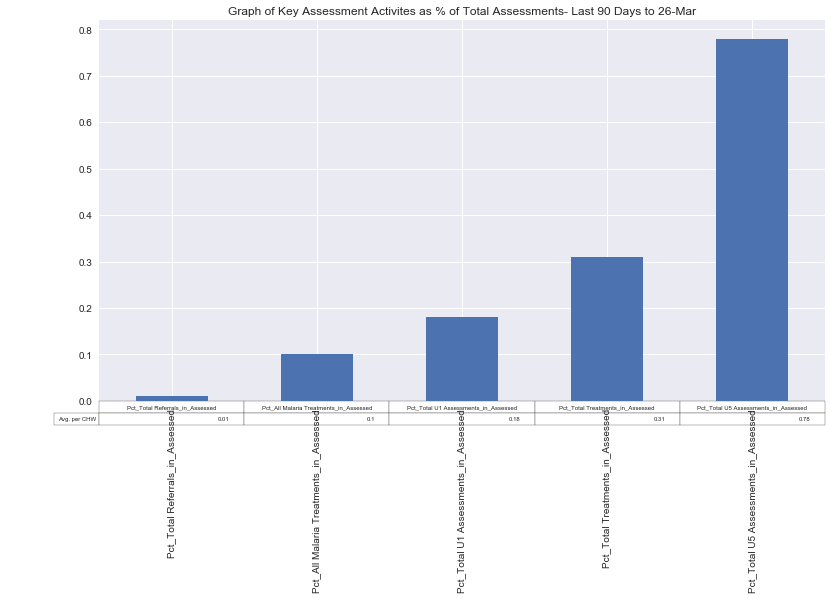

In [37]:
## Summarize 
CHWSummaries( og_dt, argz_EPM , "Summarizing Key Variables ", plotit=False)
CHWSummaries( og_dt, argz_pregoz+argz_cases+argz_u1_u5+argz_referral, "Summarizing Activities ", plotit=False) 
d,g = CHWSummaries( og_dt, argz_pct, "Graph of Key Assessment Activites as % of Total Assessments- Last 90 Days to 26-Mar", 
                   plotit=True, tbl=True, prefCol="Avg")
d
#pd.pivot_table( og_dt, index="Country", values=["Total Assessments","Total U1 Assessments","Total U5 Assessments", "Total Referrals"], aggfunc=np.sum, margins=True)

## Ogembo 2015 - 2017

**TODO**
- what's family visited, family registered, population served
- get counts of CHWs per branch or granular level  by CHW and not branch



In [7]:

ke_dt["Country"] = "KE"
ke_dt["Year"] = pd.to_datetime(ke_dt["interval_start"], dayfirst=True, errors='coerce').dt.year
ke_dt["Month"] = pd.to_datetime(ke_dt["interval_start"], dayfirst=False, errors='coerce') .dt.month 


# assign county
#TODO: reduce
ke_dt["CountyRegion"] = np.where( ke_dt["branch_name"].isin( list(REGIONS.values())[0]), list(REGIONS.keys())[0], 
                                np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[1]), list(REGIONS.keys())[1], 
                                        np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[2]), list(REGIONS.keys())[2], 
                                                 np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[3]), list(REGIONS.keys())[3], 
                                                         np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[4]), list(REGIONS.keys())[4], 
                                                                 np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[5]), list(REGIONS.keys())[5], "UNDEF" )
                                                                 )))))


## Calculated Fields
ke_dt["total_assess_child"] = ke_dt["assess_u1"]+ke_dt["assess_u5"]
ke_dt["total_assessments"]= ke_dt["assess_any"]+ke_dt["total_assess_child"]
ke_dt["total_treat_child"] = ke_dt["treatments_u1"]+ke_dt["treatments_u5"]

ke_dt["total_malaria_child"] = ke_dt["malaria_u1"]+ke_dt["malaria_u5"]
ke_dt["total_pneumonia_child"] = ke_dt["pneumonia_u1"]+ke_dt["pneumonia_u5"]
ke_dt["total_diarrhea_child"] = ke_dt["diarrhea_u1"]+ke_dt["diarrhea_u5"]

ke_dt["malaria_all_ages_pos_mrdt_treated"] = ke_dt["malaria_u5_mrtd_pos_treated"]+ke_dt["malaria_o5_mrtd_pos_treated"]

#demogz = ke_dt.melt()

In [8]:
# Totals for the year are in month 12
EOY_ke_dt = ke_dt[ ke_dt["Month"] == 12 ]

#EOY_ke_dt.info()

## Country averages on assessments, treatments and referrals
og_2017 = EOY_ke_dt[ (EOY_ke_dt["Year"]==2017) & (EOY_ke_dt["branch_name"]=="Ogembo")]

In [9]:
## Variables
ke_argz_n = ["branch_name", ""]
ke_argz_EPM = ["families_registered", "population_served", "u5_population_served", "community_events", "pregnancies_registered", "total_assess_child", "total_deliveries_at_hf", "malaria_all_ages", "families_visited" ] #"active_chws_in_period", 

ke_argz_referral = ["baby_danger_signs_refer"]
ke_argz_fus=["required_follow_ups", "on_time_follow_ups", "missed_visits"]
ke_argz_pregfus=["all_first_fu_pnc_visits", "on_time_pnc_visits_48h"]

ke_argz_diseases=["total_malaria_child", "total_pneumonia_child","total_diarrhea_child"]
ke_argz_malaria=["malaria_all_ages_pos_mrdt_treated", "mrdt_positive", "mrdt_negative", "mrdt_none", "malaria_all_ages","total_malaria_child", "malaria_u5_mrtd_pos_treated"]

ke_argz_signs = ["fever_cases", "fast_breathing_u5", "cough_two_weeks"]

ke_argz_pregoz = ["pregnancies_registered", "underage_pregnancies","total_deliveries_at_hf" ,"anc_visits", "on_time_pnc_visits",  "total_healthy_pnc_visits", "all_first_fu_pnc_visits", "on_time_pnc_visits_48h", "mothers_counselled_on_exclusive_breastfeeding"]

### The Summary Tables

In [10]:
print("\n\n\n1.Ogembo Totals By Year")
pd.pivot_table( EOY_ke_dt[ EOY_ke_dt["branch_name"]=="Ogembo"], 
               index=["branch_name", "Year"],
               values=ke_argz_EPM, aggfunc=np.sum, margins=True) 




1.Ogembo Totals By Year


community_events  families_registered  families_visited  \
branch_name Year                                                            
Ogembo      2015               0.0                  0.0               0.0   
            2016               0.0                  0.0               0.0   
            2017             193.0                 48.0               0.0   
All                          193.0                 48.0               0.0   

                  malaria_all_ages  population_served  pregnancies_registered  \
branch_name Year                                                                
Ogembo      2015               0.0                0.0                     0.0   
            2016               0.0                0.0                     0.0   
            2017             272.0              261.0                    71.0   
All                          272.0              261.0                    71.0   

                  total_assess_child  total_deliveries_at_hf  \
branch_name Year                                               
Ogembo      2015                 0.0                     0.0   
            2016                 0.0                     0.0   
            2017              1488.0                     0.0   
All                           1488.0                     0.0   

                  u5_population_served  
branch_name Year                        
Ogembo      2015                   0.0  
            2016                   0.0  
            2017                 130.0  
All                              130.0

In [11]:
print( "\n\n1. Country Averages per Branch ")
pd.pivot_table( EOY_ke_dt, index=[ "Year"], values=ke_argz_EPM+ke_argz_diseases+ke_argz_fus,aggfunc=np.mean, margins=False).round(1)
print( "\n\n2. Ogembo Averages")
pd.pivot_table( EOY_ke_dt[ EOY_ke_dt["branch_name"]=="Ogembo"], index=[ "Year"], values=ke_argz_EPM+ke_argz_diseases+ke_argz_fus,aggfunc=np.mean, margins=False).round(1)




1. Country Averages per Branch 


,community_events,families_registered,families_visited,malaria_all_ages,missed_visits,on_time_follow_ups,population_served,pregnancies_registered,required_follow_ups,total_assess_child,total_deliveries_at_hf,total_diarrhea_child,total_malaria_child,total_pneumonia_child,u5_population_served
Year,,,,,,,,,,,,,,,
2015,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,8.9,916.2,0.0,239.8,18.4,63.4,3365.4,76.6,81.7,605.6,0.0,88.6,170.6,75.1,489.4
2017,154.3,143.4,0.0,754.2,37.8,193.9,600.3,95.8,231.6,1744.3,0.0,205.5,584.7,176.4,217.7




2. Ogembo Averages


,community_events,families_registered,families_visited,malaria_all_ages,missed_visits,on_time_follow_ups,population_served,pregnancies_registered,required_follow_ups,total_assess_child,total_deliveries_at_hf,total_diarrhea_child,total_malaria_child,total_pneumonia_child,u5_population_served
Year,,,,,,,,,,,,,,,
2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017,193,48,0,272,10,205,261,71,215,1488,0,177,236,184,130




 Ogembo end of 2017 


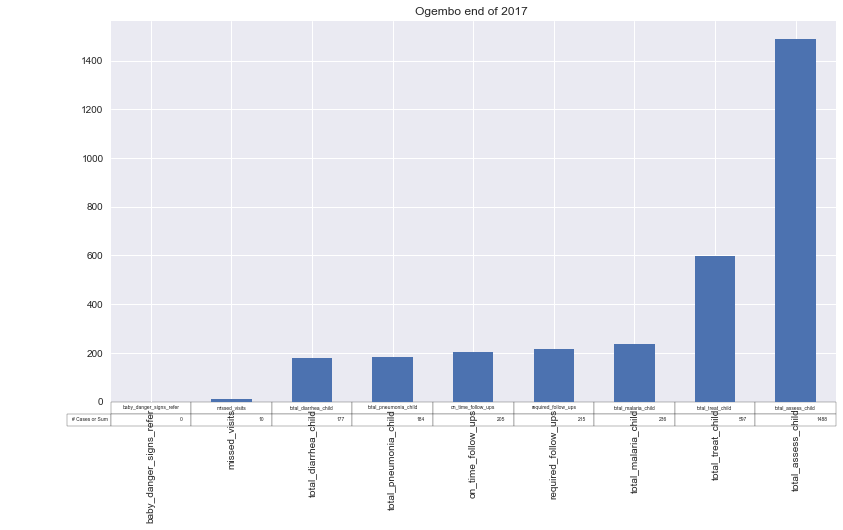

In [12]:
d,g = CHWSummaries( EOY_ke_dt[ (EOY_ke_dt["Year"]==2017) & (EOY_ke_dt["branch_name"]=="Ogembo")], ke_argz_diseases+ke_argz_referral+ke_argz_fus+["total_assess_child", "total_treat_child"], "Ogembo end of 2017 ", plotit=True, unit="Branch", tbl=True) 
g

# All KE 2015 - 2017

- unit of study is branch TODO: get at CHW level granularity

## Referral - Assessment Outcomes Nov 2017



2. Country Summarized 


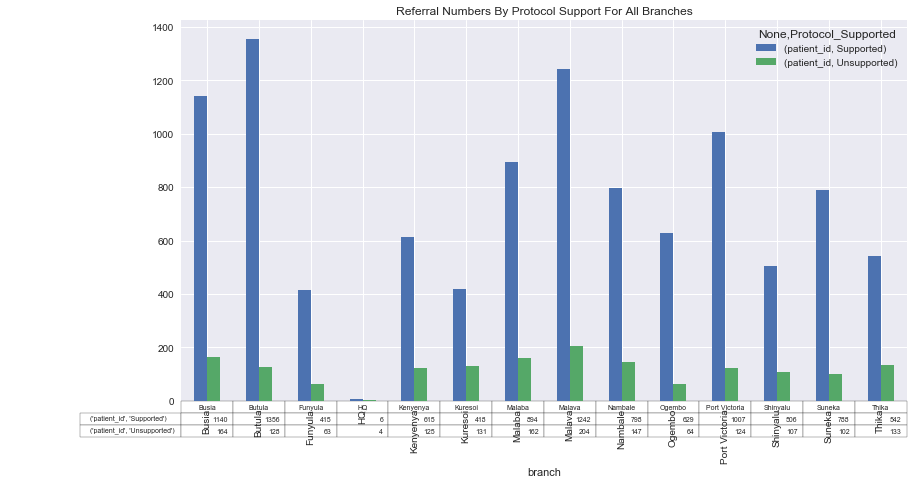

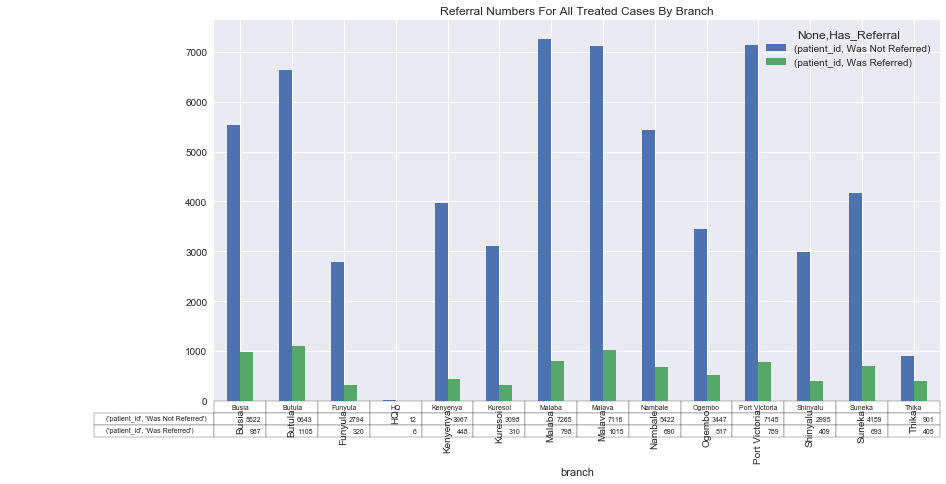

In [137]:


print("\n\n2. Country Summarized ")
dt = pd.pivot_table( ref_og_dt[ ref_og_dt["Has_Referral"]=="Was Referred"], index=["branch"], 
               columns = [ "Protocol_Supported",], 
               values=["patient_id"], 
               aggfunc="count", 
               margins=False )

dt.plot( kind="bar", title="Referral Numbers By Protocol Support For All Branches", figsize=(13,7), table=True) 

dt = pd.pivot_table( ref_og_dt[ ref_og_dt["Has_Treatment"]=="Was Treated"], index=["branch"], 
               columns = [ "Has_Referral",], 
               values=["patient_id"], 
               aggfunc="count", 
               margins=False )

dt.plot( kind="bar", title="Referral Numbers For All Treated Cases By Branch", figsize=(13,7), table=True) 


#sns.factorplot( data=ref_og_dt[ ref_og_dt["branch"]=="Ogembo"], x="Protocol_Supported", y="patient_age_in_years", hue="Has_Treatment" )



2. By Branch


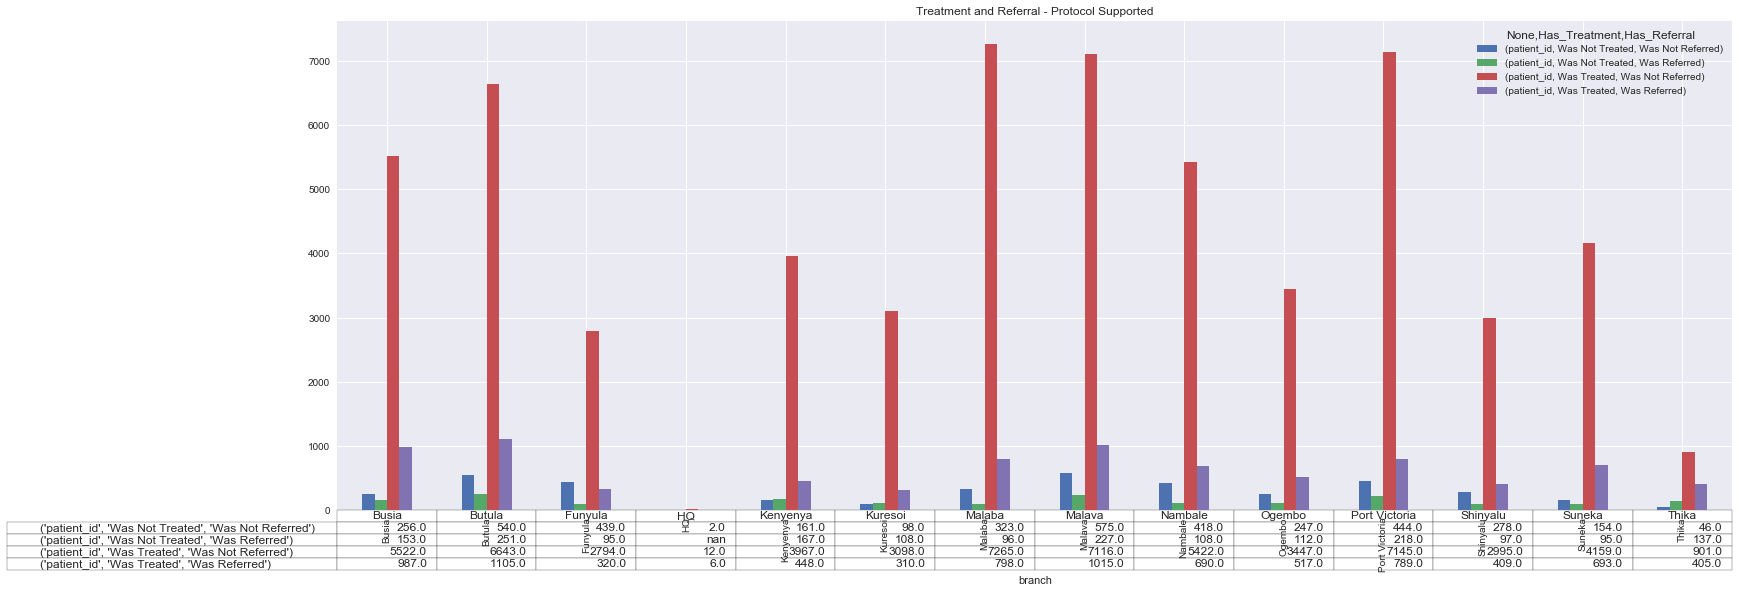

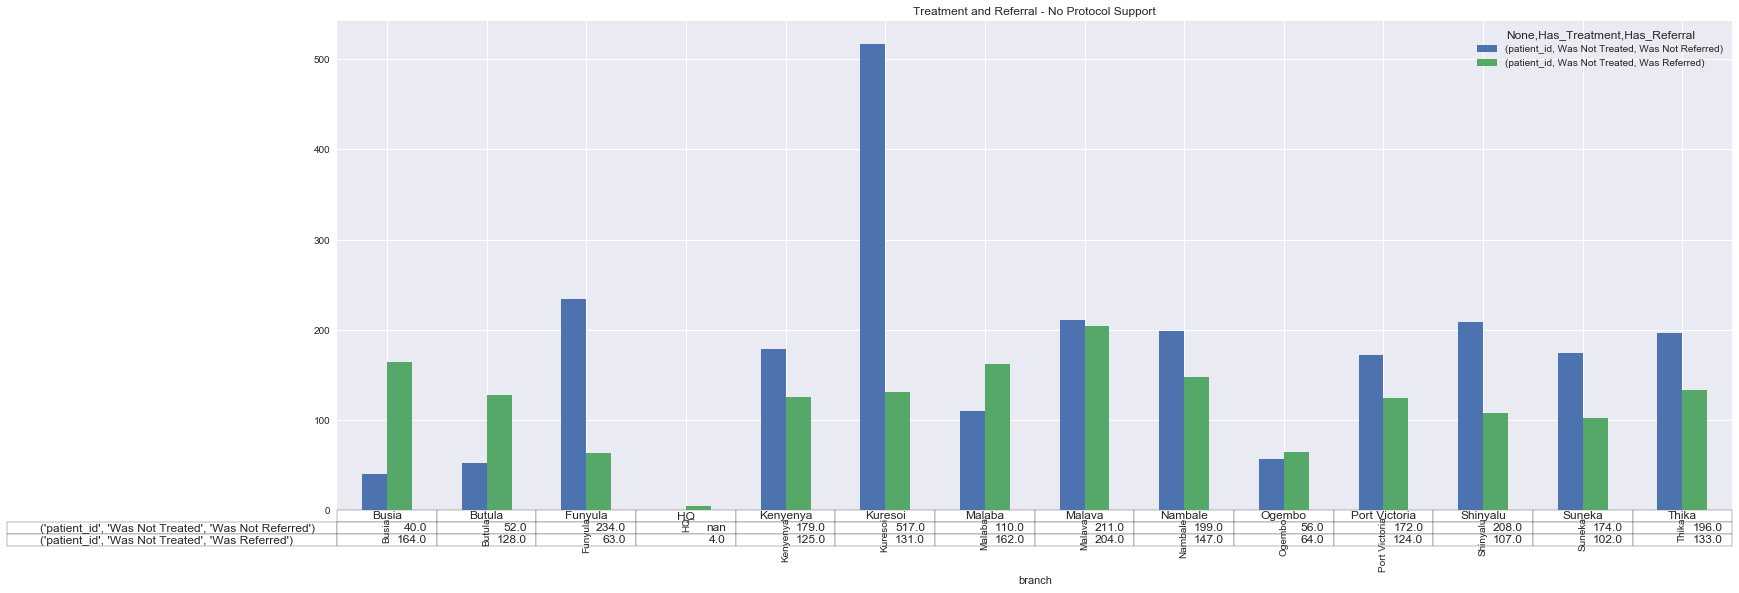

In [120]:

print("\n\n2. By Branch")
dt = pd.pivot_table( ref_og_dt[ ref_og_dt["Protocol_Supported"]=="Supported"], index=["branch"], 
               columns = [ "Has_Treatment", "Has_Referral",], 
               values=["patient_id"], 
               aggfunc="count", 
               margins=False )


dt.plot( kind="bar", title="Treatment and Referral - Protocol Supported Cases", figsize=(25,9), table=True) 
 
dt = pd.pivot_table( ref_og_dt[ ref_og_dt["Protocol_Supported"]=="Unsupported"], index=["branch"], 
               columns = [ "Has_Treatment", "Has_Referral",], 
               values=["patient_id"], 
               aggfunc="count", 
               margins=False )


dt.plot( kind="bar", title="Treatment and Referral - No Protocol Support", figsize=(25,9), table=True) 
 

Referral & Treatment Numbers/Counts


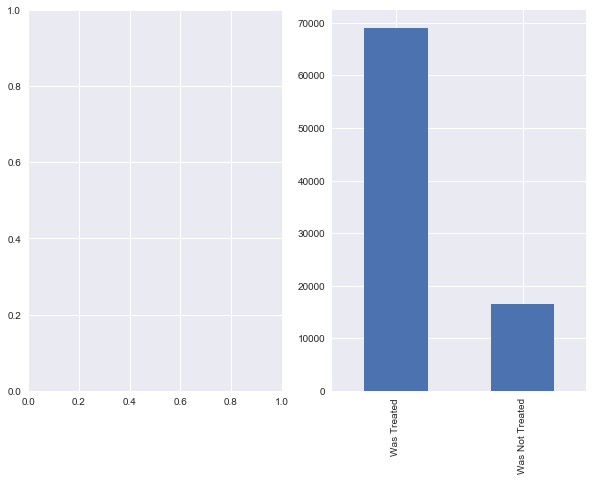

In [149]:
print('Referral & Treatment Numbers/Counts')
f,a = plt.subplots( figsize=(10,7), ncols=2)
f.add_subplot( ref_og_dt["health_problems"].value_counts().plot(kind="bar"), 111)
f.add_subplot( ref_og_dt["assessmentoutcome"].value_counts().plot(kind="bar"), 122)
f.add_subplot( ref_og_dt["Has_Referral"].value_counts().plot(kind="bar"), 213)
f.add_subplot( ref_og_dt["Has_Treatment"].value_counts().plot(kind="bar"), 224)
plt.show()

## Summaries KE - Assessment Details

In [34]:
print("\n\n Number of CHPs and Households")
pd.pivot_table( ref_og_dt, index=["branch","supervisor"], values=["chpid", "patient_id", "uuid"], aggfunc="count", margins=True )



 Number of CHPs and Households


chpid  patient_id     uuid
branch        supervisor                                             
Busia         Bernard Mwaniki              621.0       621.0    621.0
              Beryle Suka                 1381.0      1381.0   1381.0
              Edward Mbinji Ochondo       1628.0      1628.0   1628.0
              John Kevin Tweni             585.0       585.0    585.0
              Linda Njoki Ireri            722.0       722.0    722.0
              Penny O. Ajosi              1217.0      1217.0   1217.0
              Unassigned Supervisor          6.0         6.0      6.0
              Winnie Ayimba               1099.0      1099.0   1099.0
Butula        Jane Gachambi Mwai           931.0       931.0    931.0
              Mercy Okoth                 1247.0      1247.0   1247.0
              Peter Makate Okumbo         1644.0      1644.0   1644.0
              Primrose Ayieko             1156.0      1156.0   1156.0
              Richard Opiyo                943.0       943.0    943.0
              Samantha Oimba Muhombe      1794.0      1794.0   1794.0
              Vincent Apiit               1316.0      1316.0   1316.0
Funyula       Erina Makhulo                982.0       982.0    982.0
              Grace Mueni Kikosi           658.0       658.0    658.0
              Ouma Anthony Robanus         841.0       841.0    841.0
              Relton Ochieng Khaimia       769.0       769.0    769.0
              Unassigned Supervisor          1.0         1.0      1.0
HQ            Unassigned Supervisor         21.0        21.0     21.0
Kenyenya      Derrick Otieno Ochieng       883.0       883.0    883.0
              Doreen Lugongo               666.0       666.0    666.0
              Elddah Nyaitondi Onyancha   1236.0      1236.0   1236.0
              Elmer Ombogo Onyancha        693.0       693.0    693.0
              Maacah Akinyi Otieno         990.0       990.0    990.0
              Susan Chibole Nandwa         549.0       549.0    549.0
Kuresoi       Caroline Irungu             1392.0      1392.0   1392.0
              Catherine Wangui Kiprutto    917.0       917.0    917.0
              Ezra Kibiwot Cheruiyot      1131.0      1131.0   1131.0
...                                          ...         ...      ...
Ogembo        Agripina Mukungu             662.0       662.0    662.0
              Alfred Oula                  877.0       877.0    877.0
              Hadija Singor Shaban        1263.0      1263.0   1263.0
              Michael Nyongesa             945.0       945.0    945.0
              Pauline Okondo Omolo         865.0       865.0    865.0
              Unassigned Supervisor         37.0        37.0     37.0
Port Victoria Betram Odhiambo             1687.0      1687.0   1687.0
              Edith Namarome Wanjala      1256.0      1256.0   1256.0
              Isabella Waburiri           1178.0      1178.0   1178.0
              James Asialayide            1782.0      1782.0   1782.0
              Joseph Thomas Omondi        1498.0      1498.0   1498.0
              Karenee Wambalaba           1690.0      1690.0   1690.0
Shinyalu      Beatrice Awuor Otieno        551.0       551.0    551.0
              Einstein Edwin Musumi       1162.0      1162.0   1162.0
              Joachim Mbakaya Luseka      1079.0      1079.0   1079.0
              Monica Wandera Adongo       1461.0      1461.0   1461.0
              Unassigned Supervisor         38.0        38.0     38.0
Suneka        Fredrick Ngugi Kamau         597.0       597.0    597.0
              Grace Kabui Nyongoro         893.0       893.0    893.0
              Herine Adhiambo Waswa       1018.0      1018.0   1018.0
              Joyce Jeptoo Bwaley         1059.0      1059.0   1059.0
              Merceline Akinyi Kamol      1262.0      1262.0   1262.0
              Naomi Minjire                415.0       415.0    415.0
              Unassigned Supervisor         42.0        42.0     42.0
Thika         Alice Atieno Opalla          224.0     

## Summaries KE 2015 - 2017 



 2. Diseases and Followups for 2017


 i.Summarizing Diseases @ KE 2017 


,total_malaria_child,total_pneumonia_child,total_diarrhea_child,baby_danger_signs_refer,required_follow_ups,on_time_follow_ups,missed_visits
# Cases or Sum,8186.00,2470.00,2877.0,0.0,3243.00,2714.00,529.00
Avg. per Branch,584.71,176.43,205.5,0.0,231.64,193.86,37.79
Max per Branch,1655.00,324.00,511.0,0.0,374.00,316.00,92.00
Min per Branch,5.00,5.00,2.0,0.0,9.00,1.00,5.00


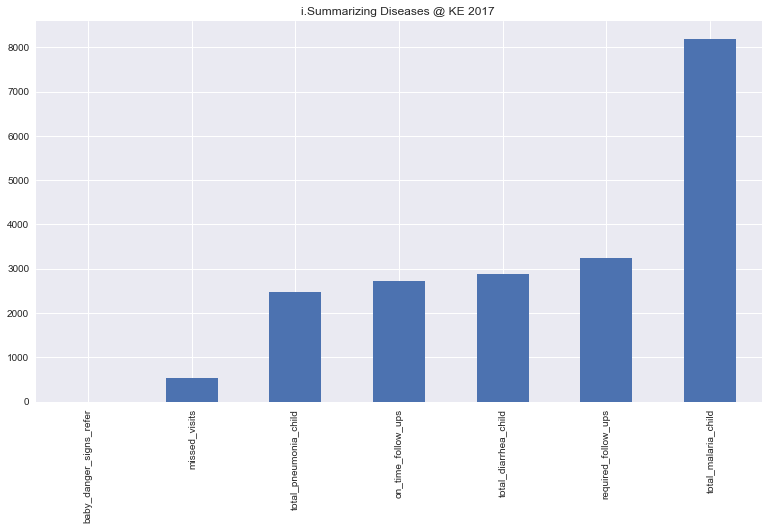

In [13]:
print("\n\n 2. Diseases and Followups for 2017")
d,g = CHWSummaries( EOY_ke_dt[ EOY_ke_dt["Year"]==2017], ke_argz_diseases+ke_argz_referral+ke_argz_fus, "i.Summarizing Diseases @ KE 2017 ", plotit=True, unit="Branch") 
d
g


# Appendix

## Ogembo Additions



 Getting a feel of distribution based on Households Registered


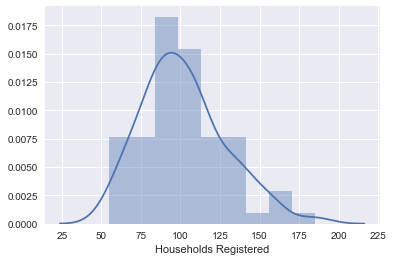

In [14]:
print("\n\n Getting a feel of distribution based on Households Registered")
og_dt.drop( og_dt[ (og_dt["Households Registered"] < 20) | (og_dt["Households Registered"] >250) ].index, inplace=True)
sns.distplot( og_dt["Households Registered"] )


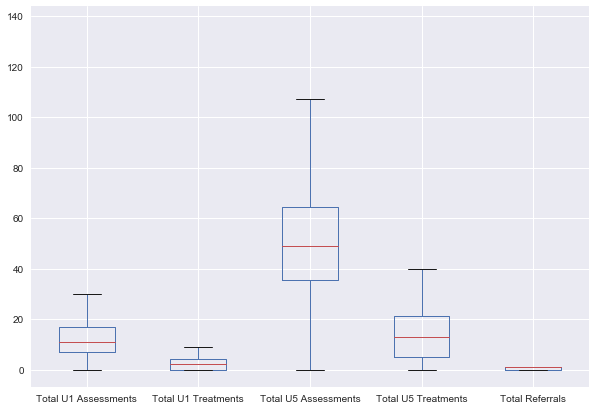

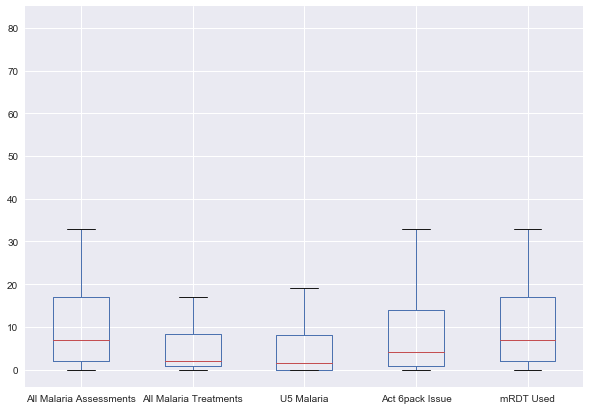

In [15]:
plotBoxz( og_dt, argz_u1_u5+argz_referral)
plotBoxz( og_dt, argz_malaria)

### Correlations
- Key indicators
- Within Malaria
- Amongst cases/diseases
- Relative to Sales target of KES {{SALES_TARGET}}



1. Correlations - Within KPIs


,Sales,Community Events,Pregnancy,Total Referrals,Total Treatments,Total Assessments,All Malaria Assessments
Sales,1.000,0.792,0.314,0.282,0.113,0.229,-0.025
Community Events,0.792,1.000,0.245,0.258,0.149,0.385,-0.001
Pregnancy,0.314,0.245,1.000,0.403,0.381,0.364,0.275
Total Referrals,0.282,0.258,0.403,1.000,0.326,0.374,0.149
Total Treatments,0.113,0.149,0.381,0.326,1.000,0.511,0.729
Total Assessments,0.229,0.385,0.364,0.374,0.511,1.000,0.363
All Malaria Assessments,-0.025,-0.001,0.275,0.149,0.729,0.363,1.000


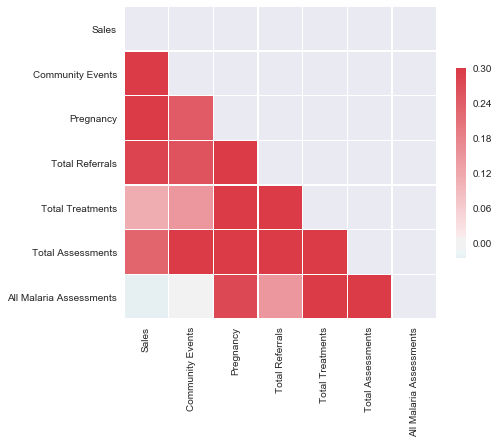

In [16]:
print("\n\n1. Correlations - Within KPIs")
t,g = plotCorrz( corrz( og_dt, argz_EPM) )
t




2. Correlations - Amongst Diseases/Cases


,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Total Referrals,Pregnancy
U5 Malaria,1.000,0.258,0.260,0.178,0.214
U5 Pneumonia,0.258,1.000,0.361,0.290,0.233
U5 Diarrhea,0.260,0.361,1.000,0.238,0.362
Total Referrals,0.178,0.290,0.238,1.000,0.403
Pregnancy,0.214,0.233,0.362,0.403,1.000


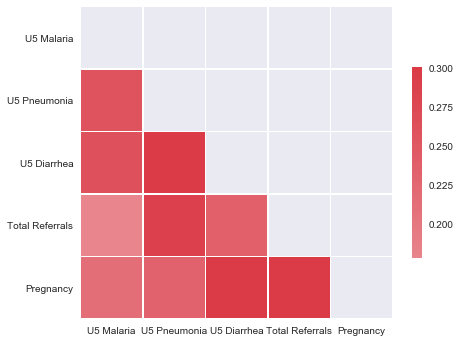

In [17]:
print("\n\n2. Correlations - Amongst Diseases/Cases")
t,g = plotCorrz( corrz( og_dt, argz_cases+argz_referral+argz_pregoz) )
t




3.a. Correlations - Relative to Sales Targets - 1).Misses Target


,Sales,Community Events,Pregnancy,Total Referrals,Total Treatments,Total Assessments,All Malaria Assessments
Sales,1.000,0.396,0.293,0.677,0.421,0.266,0.130
Community Events,0.396,1.000,0.488,0.460,0.144,0.385,0.209
Pregnancy,0.293,0.488,1.000,0.508,0.486,0.663,0.273
Total Referrals,0.677,0.460,0.508,1.000,0.236,0.347,0.019
Total Treatments,0.421,0.144,0.486,0.236,1.000,0.585,0.586
Total Assessments,0.266,0.385,0.663,0.347,0.585,1.000,0.558
All Malaria Assessments,0.130,0.209,0.273,0.019,0.586,0.558,1.000


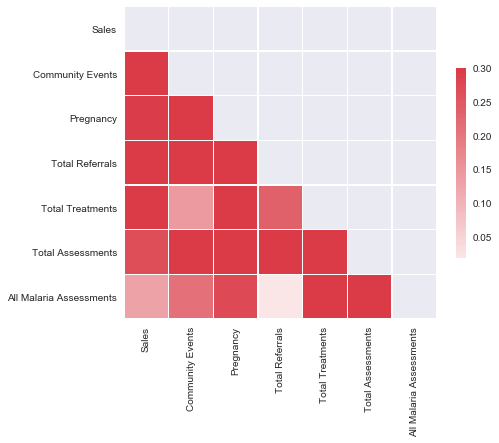

In [18]:
print("\n\n3.a. Correlations - Relative to Sales Targets - 1).Misses Target")
t,g = plotCorrz( corrz( og_dt[og_dt["Hits_Sales_Target"]==0], argz_EPM) )
t




3.b. Correlations - Relative to Sales Targets - 2).Hits Target


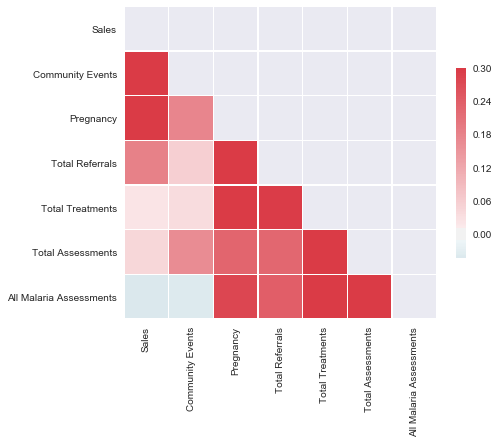

In [19]:
print("\n\n3.b. Correlations - Relative to Sales Targets - 2).Hits Target")
t,g = plotCorrz( corrz( og_dt[og_dt["Hits_Sales_Target"]==1], argz_EPM) )


### By HH Quintiles

## All KE Additions

In [20]:
print("\n\n1. All Branches At End of Each Year")
pd.pivot_table( EOY_ke_dt, index=["CountyRegion", "branch_name", "Year"], values=ke_argz_EPM+ke_argz_referral+ke_argz_fus,aggfunc=np.sum, margins=True)






1. All Branches At End of Each Year


baby_danger_signs_refer  community_events  \
CountyRegion    branch_name   Year                                              
BUSIA_COUNTY    Busia         2015                      0.0               0.0   
                              2016                      0.0              42.0   
                              2017                      0.0              44.0   
                Butula        2015                      0.0               0.0   
                              2016                      0.0               9.0   
                              2017                      0.0             132.0   
                Funyula       2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             145.0   
                Malaba        2015                      0.0               0.0   
                              2016                      0.0              38.0   
                              2017                      0.0              65.0   
                Nambale       2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             357.0   
                Port Victoria 2015                      0.0               0.0   
                              2016                      0.0              23.0   
                              2017                      0.0             388.0   
KAKAMEGA_COUNTY Malava        2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             189.0   
                Shinyalu      2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             171.0   
KHQ             HQ            2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0               0.0   
KIAMBU_COUNTY   Thika         2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0              31.0   
KISII_COUNTY    Kenyenya      2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             265.0   
                Ogembo        2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             193.0   
                Suneka        2015                      0.0               0.0   
                              2016                      0.0              12.0   
                              2017                      0.0              71.0   
NAKURU_COUNTY   Kuresoi       2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             109.0   
All                                                     0.0            2284.0   

                                    families_registered  families_visited  \
CountyRegion    branch_name   Year                                          
BUSIA_COUNTY    Busia         2015                  2.0               0.0   
                              2016               2072.0               0.0   
                              2017                139.0               0.0   
     



2. Correlations - Amongst Key Variables


,families_registered,population_served,u5_population_served,community_events,pregnancies_registered,total_assess_child,total_deliveries_at_hf,malaria_all_ages,families_visited
families_registered,1.000,0.993,0.978,-0.094,0.716,0.193,NaN,0.098,NaN
population_served,0.993,1.000,0.978,-0.074,0.725,0.213,NaN,0.117,NaN
u5_population_served,0.978,0.978,1.000,0.046,0.829,0.373,NaN,0.249,NaN
community_events,-0.094,-0.074,0.046,1.000,0.391,0.725,NaN,0.427,NaN
pregnancies_registered,0.716,0.725,0.829,0.391,1.000,0.787,NaN,0.612,NaN
total_assess_child,0.193,0.213,0.373,0.725,0.787,1.000,NaN,0.798,NaN
total_deliveries_at_hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malaria_all_ages,0.098,0.117,0.249,0.427,0.612,0.798,NaN,1.000,NaN
families_visited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


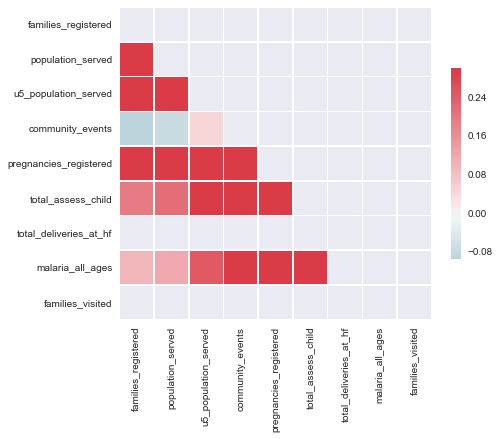

In [21]:
print("\n\n2. Correlations - Amongst Key Variables")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_EPM,) )
t




 3. Pregnancy


 i.Summarizing Pregnancy Activity @ KE 2017


,pregnancies_registered,underage_pregnancies,total_deliveries_at_hf,anc_visits,on_time_pnc_visits,total_healthy_pnc_visits,all_first_fu_pnc_visits,on_time_pnc_visits_48h,mothers_counselled_on_exclusive_breastfeeding
# Cases or Sum,1341.00,107.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avg. per Branch,95.79,7.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max per Branch,147.00,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Min per Branch,10.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


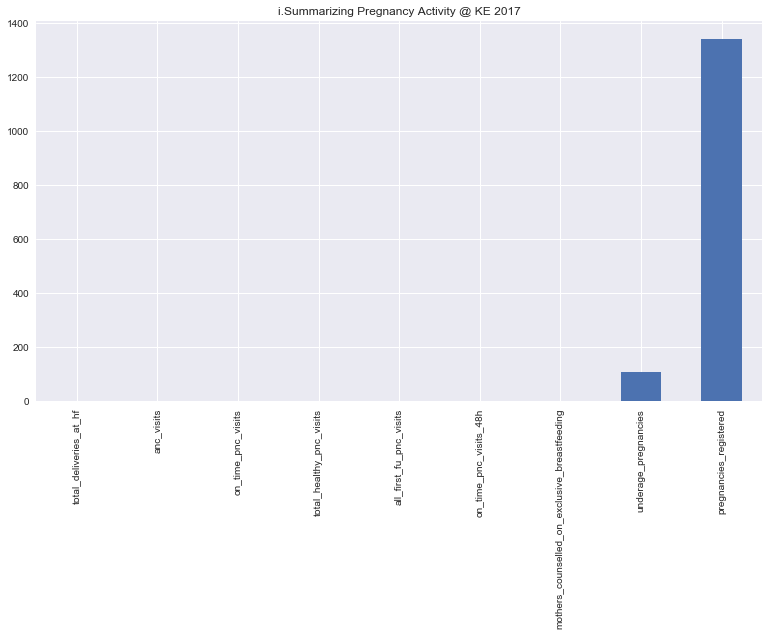

In [22]:
print("\n\n 3. Pregnancy")
d,g = CHWSummaries( EOY_ke_dt[ EOY_ke_dt["Year"]==2017], ke_argz_pregoz, "i.Summarizing Pregnancy Activity @ KE 2017", plotit=True, unit="Branch") 
d
g




ii.. Correlations - Amongst Cases or Diseases


,pregnancies_registered,underage_pregnancies,total_deliveries_at_hf,anc_visits,on_time_pnc_visits,total_healthy_pnc_visits,all_first_fu_pnc_visits,on_time_pnc_visits_48h,mothers_counselled_on_exclusive_breastfeeding,total_malaria_child,total_pneumonia_child,total_diarrhea_child,fever_cases,fast_breathing_u5,cough_two_weeks
pregnancies_registered,1.000,0.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.651,0.717,0.811,0.704,0.718,0.750
underage_pregnancies,0.956,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591,0.713,0.794,0.627,0.707,0.706
total_deliveries_at_hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_time_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_healthy_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_first_fu_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_time_pnc_visits_48h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mothers_counselled_on_exclusive_breastfeeding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_malaria_child,0.651,0.591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.621,0.768,0.970,0.618,0.438


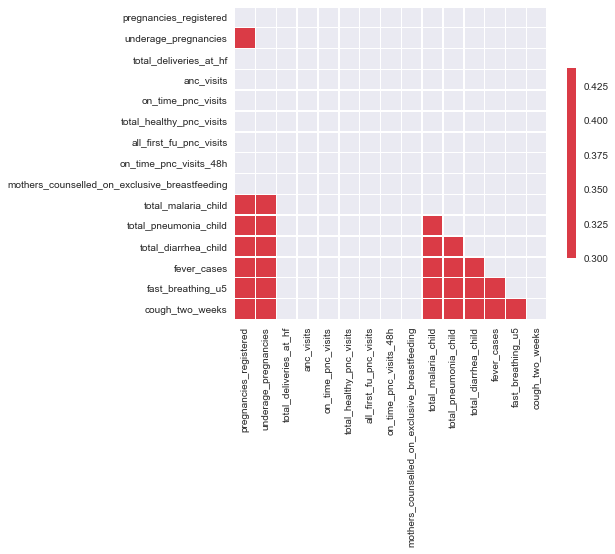

In [23]:

print("\n\nii.. Correlations - Amongst Cases or Diseases")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_pregoz+ke_argz_diseases+ke_argz_signs,) )
t
